<a href="https://colab.research.google.com/github/udayameister/CST-GNN/blob/main/sMRI_preprocess_AAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nibabel dipy nilearn networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 4.0.2
    Uninstalling nibabel-4.0.2:
      Successfully uninstalled nibabel-4.0.2


In [3]:
import nibabel as nib
import numpy as np
from nilearn.image import resample_to_img
from nilearn.input_data import NiftiLabelsMasker
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [4]:
# Define file paths
anat_path = '/content/sub-CON02_ses-preop_T1w.nii.gz'
aal_atlas_path = '/content/AAL.nii.gz'

In [5]:
# Load the MRI anatomical image
anat_img = nib.load(anat_path)

# Load AAL atlas and resample to MRI image space
aal_atlas = nib.load(aal_atlas_path)
aal_resampled = resample_to_img(aal_atlas, anat_img, interpolation='nearest')

# Create a masker object to extract time series data from the regions
masker = NiftiLabelsMasker(labels_img=aal_resampled, standardize=True)

# Extract the time series (in this case, the intensity values) for AAL regions
time_series = masker.fit_transform(anat_img)

# Number of regions in the AAL atlas
n_regions = 90

/usr/local/lib/python3.10/dist-packages/nilearn/signal.py:74: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


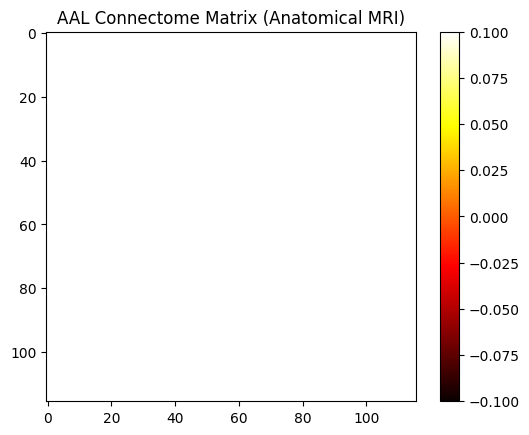

MRI anatomical image preprocessing and connectome matrix construction complete.


In [6]:
# Calculate the connectivity matrix based on intensity correlations
connectome_matrix = np.corrcoef(time_series.T)

# Save the connectivity matrix
np.save('connectome_matrix_anat.npy', connectome_matrix)

# Visualize the connectivity matrix
plt.imshow(connectome_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('AAL Connectome Matrix (Anatomical MRI)')
plt.show()

print("MRI anatomical image preprocessing and connectome matrix construction complete.")